In [1]:
# (a) Support vector regression
# (b) Random forest
# (c) AdaBoost
# (d) Regression tree
# (e) Gradient boosting
# (f) XGBoost

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets


In [3]:
# url = 'https://docs.google.com/spreadsheets/d/1YoHGMt9RA10p5qZ_WHJGpnVROT-6XHJNoePDzmKzv4U/edit?usp=sharing'
# html = pd.read_html(url, header = 1, index_col= 1)
# df= html[0]
# data = df.drop(['1'],axis =1)


In [4]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Processing 

### Find Null data 

In [7]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
# show how many rows contain at least one null
# remove the whole row with null

print(null)


                                Null Values  Percentage Null Values
hotel                                     0                0.000000
is_canceled                               0                0.000000
lead_time                                 0                0.000000
arrival_date_year                         0                0.000000
arrival_date_month                        0                0.000000
arrival_date_week_number                  0                0.000000
arrival_date_day_of_month                 0                0.000000
stays_in_weekend_nights                   0                0.000000
stays_in_week_nights                      0                0.000000
adults                                    0                0.000000
children                                  4                0.003350
babies                                    0                0.000000
meal                                      0                0.000000
country                                 488     

#### There are 488 null values in [country]; 16340 null values in [agent]; 112593 null values in [company]; 4 null values in [children]
### Replace the null values with -1

In [8]:
df.fillna(-1, inplace = True)  
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
# show how many rows contain at least one null
# remove the whole row with null

print(null)

                                Null Values  Percentage Null Values
hotel                                     0                     0.0
is_canceled                               0                     0.0
lead_time                                 0                     0.0
arrival_date_year                         0                     0.0
arrival_date_month                        0                     0.0
arrival_date_week_number                  0                     0.0
arrival_date_day_of_month                 0                     0.0
stays_in_weekend_nights                   0                     0.0
stays_in_week_nights                      0                     0.0
adults                                    0                     0.0
children                                  0                     0.0
babies                                    0                     0.0
meal                                      0                     0.0
country                                   0     

### Remove invalid data

#### case 1: Baby, Children and Adult can't be zero thus there should not be any booking at all
#### case 2: Adult can't be zero while baby or children are non-zero, every hotel booking requires 18+

In [9]:
# state how many cases like that
# remove the data


# adult babies and children cannot be 0 at the same time
filter1 = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter1]


# adult can't be 0 when babies and children are non zero at the same time
filter2 = (df.children != 0) & (df.adults == 0) | (df.babies != 0) &  (df.adults == 0)
df[filter2]


#print original data shape 
print(df.shape)
# remove the above two conditions
df = df[~filter1 & ~filter2]
print(df.shape)

(119390, 32)
(118987, 32)


#### There are 403 invalid data are removed from the dataset based on two cases indicated above 

### Convert non-numerical features to numerical

#### Find all non-numerical data

In [10]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_nonNum = df.select_dtypes(exclude=numerics)
df_nonNum


nonNum_FeatureList = df_nonNum.columns

print('Below are the features with non-numerical data: ')
print(' ')
print(nonNum_FeatureList)

nonNum_FeatureList = nonNum_FeatureList.to_numpy()

Below are the features with non-numerical data: 
 
Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')


#### Function to Covert all non-numerical data to numerical

In [11]:
def convertNon2Num(NonNumFeatures):
    
    for i in range(len(NonNumFeatures)):
#         if df_nonNum[NonNumFeatures[i]] =='country':
#             continue
        print(NonNumFeatures[i])
        uniDataList = df_nonNum[NonNumFeatures[i]].unique()
        print(uniDataList)
#         for j in range(len(uniDataList)):
#             df_nonNum[NonNumFeatures[i]] = df_nonNum[NonNumFeatures[i]].map({uniDataList: j})
#     return df_nonNum[NonNumFeatures[i]]

In [12]:
convertNon2Num(nonNum_FeatureList)

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' -1 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ

In [13]:
df['hotel'] = df['hotel'].map({'Resort Hotel':0, 'City Hotel':1})
df['arrival_date_month'] = df['arrival_date_month'].map({'January':1 ,'February':2, 'March':3,'April':4,'May':5,'June':6,
                                                        'July':7, 'August': 8,'September':9,'October':10, 'November':11,'December':12})
df['meal'] = df['meal'].map({'SC':0, 'Undefined':0, 'BB':1, 'FB':2, 'HB':3})
df=df.drop(['country'], axis=1)
df['market_segment'] = df['market_segment'].map({'Direct':0, 'Complementary':1,'Groups':2,'Online TA':3, 'Offline TA/TO':4,'Corporate':5, 'Undefined':6, 'Aviation':7})
df['distribution_channel'] = df['distribution_channel'].map({'Direct':0, 'Corporate':1,'TA/TO':2,'Undefined':3, 'GDS':4})
df['reserved_room_type'] = df['reserved_room_type'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4 , 'F':5, 'G':6 ,'H':7 ,'I':8, 'K':9, 'L':10})
df['assigned_room_type'] = df['assigned_room_type'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4 , 'F':5, 'G':6 ,'H':7 ,'I':8, 'K':9, 'L':10})

df['deposit_type'] = df['deposit_type'].map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})
df['customer_type'] = df['customer_type'].map({'Transient':0, 'Transient-Party':1, 'Group':2, 'Contract':3})
df=df.drop(['reservation_status'], axis=1)
df=df.drop(['reservation_status_date'], axis=1)



# df['reservation_status'] = df['reservation_status'].map({'Canceled':1 ,'Check-Out':2, 'No-Show':3})
# # set Resort Hotel to 1 and City Hotel to 2
# df['hotel'] = df['hotel'].map({'Resort Hotel':1 ,'City Hotel':2 })
# # set months to according numbers 

In [14]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,0,342,2015,7,27,1,0,0,2,...,2,3,0,-1.0,-1.0,0,0,0.0,0,0
1,0,0,737,2015,7,27,1,0,0,2,...,2,4,0,-1.0,-1.0,0,0,0.0,0,0
2,0,0,7,2015,7,27,1,0,1,1,...,2,0,0,-1.0,-1.0,0,0,75.0,0,0
3,0,0,13,2015,7,27,1,0,1,1,...,0,0,0,304.0,-1.0,0,0,75.0,0,0
4,0,0,14,2015,7,27,1,0,2,2,...,0,0,0,240.0,-1.0,0,0,98.0,0,1


In [15]:
df.shape

(118987, 29)

### Heat Map Analysis 

(29, 29)


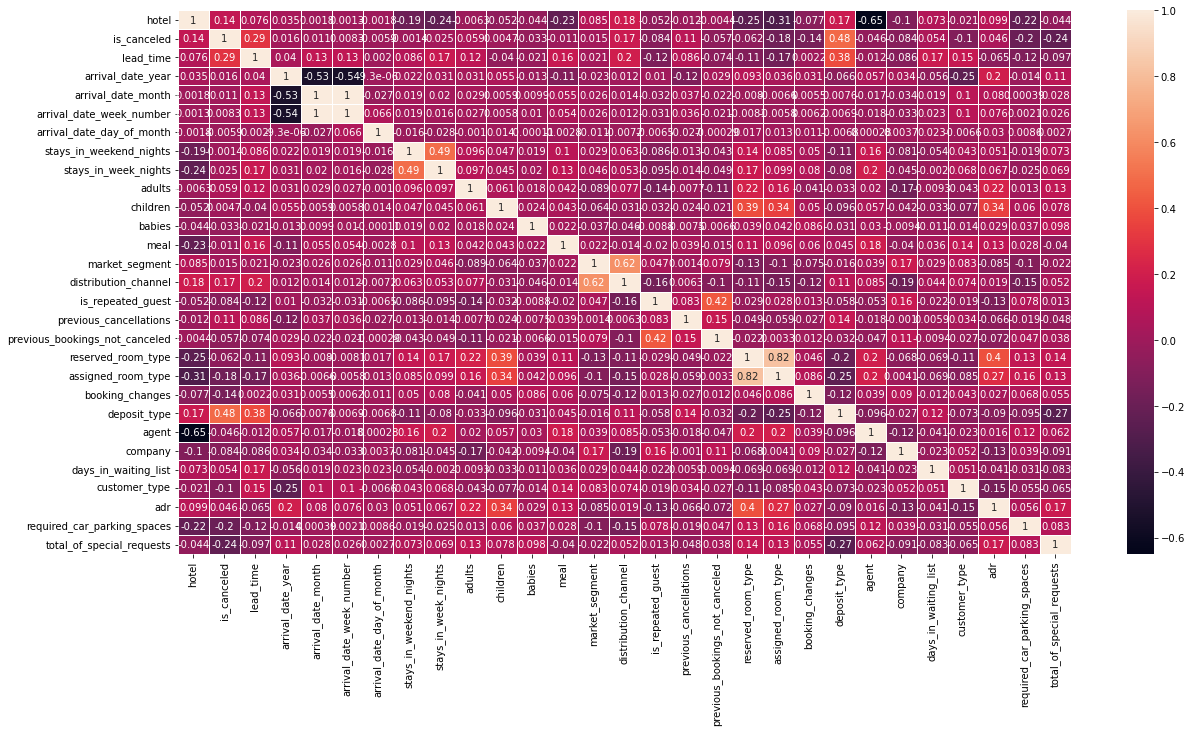

In [16]:
plt.figure(figsize = (20,10))
corr = df.corr()
print(corr.shape)
sns.heatmap(corr, annot= True, linewidths=1)
plt.show()

In [17]:
correlation = df.corr()['is_canceled']
correlation = correlation.sort_values(ascending=False)
correlation

is_canceled                       1.000000
deposit_type                      0.481008
lead_time                         0.292983
distribution_channel              0.169825
hotel                             0.137260
previous_cancellations            0.110222
adults                            0.058891
days_in_waiting_list              0.054357
adr                               0.046460
stays_in_week_nights              0.025348
arrival_date_year                 0.016450
market_segment                    0.014857
arrival_date_month                0.011176
arrival_date_week_number          0.008323
children                          0.004724
stays_in_weekend_nights          -0.001388
arrival_date_day_of_month        -0.005878
meal                             -0.010578
babies                           -0.032620
agent                            -0.046445
previous_bookings_not_canceled   -0.057413
reserved_room_type               -0.062280
is_repeated_guest                -0.083797
company    

In [18]:
less_useful_cols = ['']

### Profiling

In [19]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

### Before PCA seperate Features from Label

In [23]:
y = df['is_canceled']
X = df.drop(['is_canceled'], axis=1)


X = np.array(X)
y = np.array(y)

In [28]:
X.shape

(118987, 28)

### PCA Dimension Reduction


 (a) At least 5 PCs are required to capture 99.0% of the total variations of the data. 



C:\Users\jaeha\AppData\Local\Temp/ipykernel_25320/1015489460.py:28: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


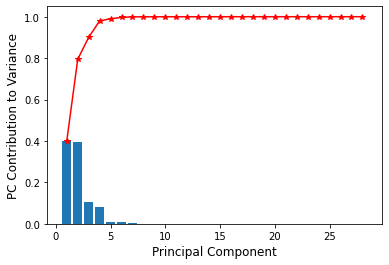

In [33]:
# Normalize the data
X_normalized = X - np.mean(X, axis = 0)

# calculate the A matrix
A = np.dot(X_normalized.T, X_normalized)

# eigenvalue decomposition of A
eigvals, eigvecs= np.linalg.eig(A)

# Sort the eigenvalues and vectors from largest to smallest
idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# contributions of principle components (PCs) to variance
var_ratio = eigvals/np.sum(eigvals)
contribution = np.cumsum(eigvals) / np.sum(eigvals)

#Given a threshold, determine the number of PCs required to capture the variance.
threshold = 0.99
PC_num = np.where(contribution >= threshold)[0][1]
print("\n (a) At least "+ str(PC_num)+" PCs are required to capture "+ str(threshold*100)+"% of the total variations of the data. \n")
      
plt.plot(np.arange(1,len(eigvals)+1), contribution, "r-*")
plt.bar(np.arange(1,len(eigvals)+1), var_ratio,)
plt.ylabel("PC Contribution to Variance", fontsize=12)
plt.xlabel("Principal Component", fontsize=12)
plt.show()
      
      
#Continue only the first "PC_num PCs with largest eigenvectors"
#eigvals_idx = eigvals[:PC_num]
#eigvecs_idx = eigvecs[:, :PC_num]
#Transform initial data through projection
#X_pca = X_normalized.dot(eigvecs_idx)
#print("\n (b) The projection of the 5th data sample is: ", X_pca[4])

C:\Users\jaeha\AppData\Local\Temp/ipykernel_25320/323993576.py:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
C:\Users\jaeha\AppData\Local\Temp/ipykernel_25320/323993576.py:23: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


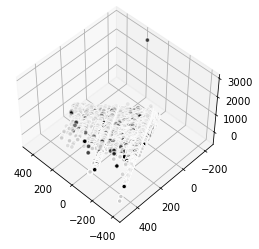

In [40]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

from sklearn.decomposition import PCA

pca = PCA(n_components =5)
pca.fit(X)
X_pca = pca.transform(X)

#draw 3D graph
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)


ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y, cmap = plt.cm.nipy_spectral, edgecolor = "w")

#ax.w_xaxis.set_ticklables([])
#ax.w_yaxis.set_ticklables([])
#ax.w_zaxis.set_ticklables([])


plt.show()

In [43]:
X_pca.shape

(118987, 5)

In [29]:
# size = X.shape[1]  #28 features

# for i in range(size):
#     s= np.sum(X.iloc[:,i])
#     m = s / (len(X.iloc[:,i]))
#     X.iloc[:,i] = X.iloc[:,i] - m 
    
    
# size = X.shape[1]  #34 features

# for i in range(size):
#     std = np.std(X.iloc[:,i])
#     X.iloc[:,i] = X.iloc[:,i]/std
    
    
# cov_mat = np.cov(X , rowvar = False)

# #Calculating Eigenvalues and Eigenvectors of the covariance matrix
# eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
# # print(eigen_values)
# print(eigen_vectors)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
# df.reset_index(drop=True, inplace=True)

# # # set Canceled to 1, Check - out to 2, No-Show to 3
# df['reservation_status'] = df['reservation_status'].map({'Canceled':1 ,'Check-Out':2, 'No-Show':3})
# # set Resort Hotel to 1 and City Hotel to 2
# df['hotel'] = df['hotel'].map({'Resort Hotel':1 ,'City Hotel':2 })
# # set months to according numbers 
# df['arrival_date_month'] = df['arrival_date_month'].map({'January':1 ,'Feburary':2, 'March':3,'April':4,'May':5,'June':6,
#                                                         'July':7, 'August': 8,'September':9,'October':10, 'November':11,'December':12})

# # set meal: BB to 1, FB to 2, HB to 3, SC to 4, Undefined to 0
# df['meal'] = df['meal'].map({'BB':1 ,'FB':2, 'HB':3, 'SC': 4, 'Undefined': 0 })
# # # Take all columns except the 'reservation_status' column
# X = df.loc[:, df.columns != 'reservation_status']
# print(X.shape)
# # Take only 'reservation_status' column
# y = df.loc[:,'reservation_status']
# print(y.shape)

# df


## Split train and test dataset

# Classification Model Selection

# Random Forest

In [ ]:
# # define a function to run the test data, Xtest, and print out the results
# def predict_test(Xtest, classifier, model_name):

#     # make predictionson the test data
#     predictions = classifier.predict(Xtest)

#     # check if the probability estimates are available
#     if hasattr(classifier, "predict_proba"):
#         predictions_proba = classifier.predict_proba(Xtest)
#         prob_estimate = True 
#     else:
#         prob_estimate = False    

#     # print out the results  
#     for i in range(len(Xtest)):       
#         print("\nThe test data point {} is classified to Category {} by {}.".format(Xtest[i], predictions[i], model_name))      
#         if prob_estimate == True:
#             print("Below is the probability estimates for each category:")    
#             for j in range(len(predictions_proba[i])):       
#                 print("Category {}: {:5.4f}".format(j, predictions_proba[i,j]))
    
#     return

In [ ]:
# # first define a function to make mesh grid and get predictions
# def meshgrid_predict(x, y, h, classifier):   
#     """Create a mesh of points to plot in"""
#     # define the min and max of the ranges
#     x_min, x_max = x.min() - 1, x.max() + 1
#     y_min, y_max = y.min() - 1, y.max() + 1
#     # create mesh grid and make predictions using the classifier
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))
#     Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     return xx, yy, Z

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Create a random forest Classifier and fit the data; n_estimators is the number of trees in the forest.
# rf_model = RandomForestClassifier(n_estimators = 10, criterion = "entropy")
# rf_model.fit(X, y)

# # call the predict_test function to predict the test data
# Xtest = [[1,2,1,2]]
# model_name = "Random Forest Classifier"
# result = predict_test(Xtest, rf_model, model_name)   